In [139]:
import numpy as np
import pandas as pd


In [140]:
df = pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [141]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [143]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

#  EDA_1 ANSWERS from 1 - 15

1. What is the range of selling prices in the datasetD
2. What is the median selling price for bikes in the datasetD
3. What is the most common seller typeD
4. How many bikes have driven more than 50,000 kilometersD
5. What is the average km_driven value for each ownership typeD
6. What proportion of bikes are from the year 2015 or olderD
7. What is the trend of missing values across the datasetD
8. What is the highest ex_showroom_price recorded, and for which bikeD
9. What is the total number of bikes listed by each seller typeD
10. What is the relationship between selling_price and km_driven for first-owner bikesD
11. Identify and remove outliers in the km_driven column using the IQR methodB
12. Perform a bivariate analysis to visualize the relationship between year and selling_priceB
13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)D
14. Which bike names are priced significantly above the average price for their manufacturing yearD
15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [144]:
df['selling_price'].min(), df['selling_price'].max()

(np.int64(5000), np.int64(760000))

In [145]:
df['selling_price'].median()


np.float64(45000.0)

In [146]:
df['seller_type'].value_counts()


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [147]:
(df['km_driven'] > 50000).sum()


np.int64(170)

In [148]:
df.groupby('owner')['km_driven'].mean().round(2).to_dict()


{'1st owner': 32816.58,
 '2nd owner': 39288.99,
 '3rd owner': 33292.18,
 '4th owner': 311500.0}

In [149]:
total = len(df)
older = (df['year'] <= 2015).sum()
older, total, older/total


(np.int64(601), 1061, np.float64(0.5664467483506126))

In [150]:
{'name': 0, 'selling_price': 0, 'year': 0, 'seller_type': 0, 'owner': 0, 'km_driven': 0, 'ex_showroom_price': 0}


{'name': 0,
 'selling_price': 0,
 'year': 0,
 'seller_type': 0,
 'owner': 0,
 'km_driven': 0,
 'ex_showroom_price': 0}

In [151]:
df.isnull().sum()


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [152]:
idx = df['ex_showroom_price'].idxmax()
df.loc[idx, ['name','ex_showroom_price']]


name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object

In [153]:
df['seller_type'].value_counts()


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

-0.24348174844965703


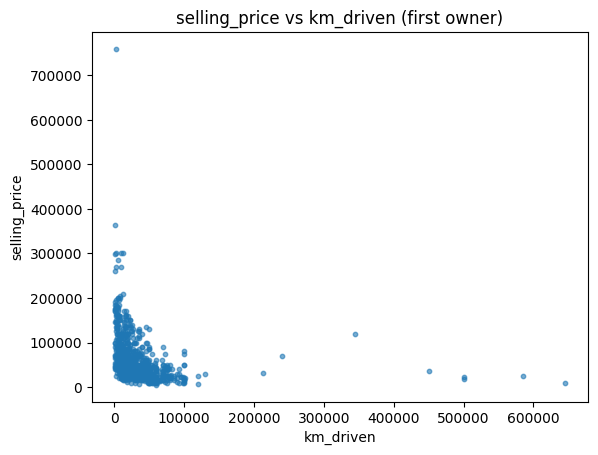

In [154]:
fo = df[df['owner'].str.contains('1', na=False)]
corr = fo['selling_price'].corr(fo['km_driven'])
print(corr)
# scatter plot
import matplotlib.pyplot as plt
plt.scatter(fo['km_driven'], fo['selling_price'], s=10, alpha=0.6)
plt.xlabel('km_driven'); plt.ylabel('selling_price'); plt.title('selling_price vs km_driven (first owner)')
plt.show()


In [155]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df['km_driven'] < lower) | (df['km_driven'] > upper)]
outliers_count = len(outliers)
df_no_out = df[~((df['km_driven'] < lower) | (df['km_driven'] > upper))].copy()


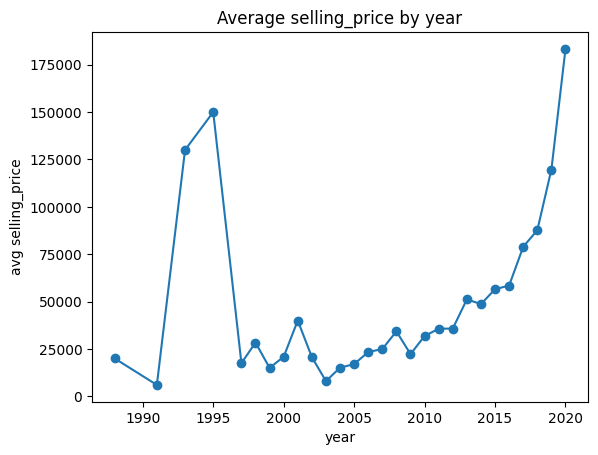

In [156]:
avg_price_by_year = df.groupby('year')['selling_price'].mean().sort_index()
import matplotlib.pyplot as plt
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o')
plt.xlabel('year'); plt.ylabel('avg selling_price'); plt.title('Average selling_price by year')
plt.show()


In [157]:
df['age'] = 2025 - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
avg_dep_by_age = df.groupby('age')['depreciation'].mean().round(2).to_dict()
avg_dep_by_age


{5: -34260.0,
 6: 2954.56,
 7: 13023.19,
 8: 22306.08,
 9: 28328.19,
 10: 28013.28,
 11: 34505.61,
 12: 43086.89,
 13: 37317.65,
 14: 47102.67,
 15: 45658.93,
 16: 38227.79,
 17: 54732.43,
 18: 42399.0,
 19: 39664.5,
 20: 44852.0,
 21: 36852.0,
 22: nan,
 23: nan,
 24: 34852.0,
 25: nan,
 26: nan,
 27: nan,
 28: nan,
 30: nan,
 32: nan,
 34: nan,
 37: nan}

In [158]:
mean_by_year = df.groupby('year')['selling_price'].transform('mean')
df['above_year_avg'] = df['selling_price'] > mean_by_year * 1.20
df_above = df[df['above_year_avg']][['name','year','selling_price']].sort_values(['year','selling_price'], ascending=[True,False])
df_above.head(50)


,name,year,selling_price
715,Yamaha RXG,1997,25000
554,Yamaha RX135,1998,65000
306,Yamaha Rx,2000,70000
837,Royal Enfield Bullet 350 [2007-2011],2001,60000
780,TVS Victor GLX,2002,27000
885,TVS Max DLX,2002,26000
903,Hero Honda Splendor Plus,2004,20000
889,Royal Enfield Thunderbird 350,2005,59000
776,Royal Enfield Electra 5 S,2006,99000
408,Royal Enfield Thunderbird 350,2006,60000


<Axes: >

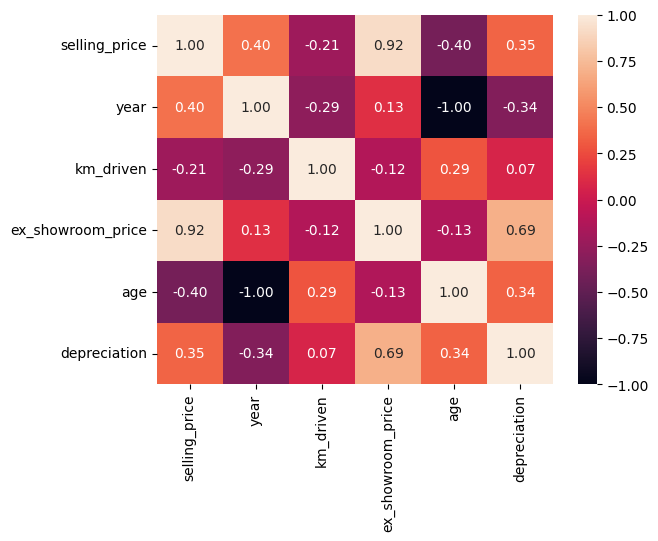

In [159]:
import seaborn as sns
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, fmt='.2f')


In [160]:
# EDA_2 ANSWER from 1 - 15 on car sales dataset

In [161]:
df1 = pd.read_csv("Car Sale.csv")
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [162]:
df1.rename(columns={'Price ($)': 'Price'}, inplace=True)



In [163]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
- it compare across different dealers?
Theory: Group by dealer and compute mean price; compare means to see which dealers sell higher- or lower-priced cars on average.


In [164]:
df1.groupby('Dealer_Name')['Price'].mean().round(2)


Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.26
C & M Motors Inc                                   28111.76
Capitol KIA                                        28189.70
Chrysler Plymouth                                  27555.53
Chrysler of Tri-Cities                             28123.09
Classic Chevy                                      28602.01
Clay Johnson Auto Sales                            27816.03
Diehl Motor CO Inc                                 27993.93
Enterprise Rent A Car                              28312.58
Gartner Buick Hyundai Saab                         28247.62
Hatfield Volkswagen                                27853.71
Iceberg Rentals                                    28522.96
McKinney Dodge Chrysler Jeep                       27684.10
Motor Vehicle Branch Office                        27956.74
Nebo Chevrolet                                     27818.89
New Castle Ford Lincoln Mercury                    27867.13
Pars Auto Sales             

2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
- Compute standard deviation of price per brand; highest std indicates within-brand price heterogeneity (multiple segments / many variants / inconsistent pricing).

In [165]:
df1.groupby('Company')['Price'].std().round(2)


Company
Acura          8183.05
Audi          12904.24
BMW           15065.58
Buick         17142.23
Cadillac      19517.12
Chevrolet     13311.06
Chrysler      11583.29
Dodge         11187.59
Ford          15849.09
Honda         11148.63
Hyundai        3485.98
Infiniti      13696.33
Jaguar        10222.53
Jeep           9459.83
Lexus         17852.92
Lincoln       19658.05
Mercedes-B    15722.81
Mercury       16445.17
Mitsubishi    11671.34
Nissan        16214.26
Oldsmobile    15711.35
Plymouth      19066.00
Pontiac       14348.96
Porsche        5261.84
Saab          19653.74
Saturn        15990.22
Subaru        12920.77
Toyota        15367.13
Volkswagen    12527.12
Volvo         12933.79
Name: Price, dtype: float64

3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
- For each transmission (Manual/Automatic/etc.) compute Q1, Q3 and IQR = Q3-Q1; compare medians and IQRs to assess spread.

In [166]:
for t in df1['Transmission'].dropna().unique():
    s = df1[df1['Transmission']==t]['Price'].dropna()
    print(t, s.quantile(0.25), s.quantile(0.75), s.quantile(0.75)-s.quantile(0.25))


Auto 19000.0 35500.0 16500.0
Manual 17000.0 34000.0 17000.0


4. What is the distribution of car prices across different regions?

In [167]:
df1.groupby('Dealer_Region')['Price'].describe()


,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


4. What is the distribution of cars based on body styles?
Theory: Count occurrences of each body style to see market composition.


In [168]:
df1['Body Style'].value_counts()


Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64

6. How does the average selling price of cars vary by customer gender and annual income?

In [169]:
df1.groupby('Gender')['Price'].mean().round(2)
df1.groupby('Gender')['Annual Income'].mean().round(2)


Gender
Female    755973.02
Male      851184.04
Name: Annual Income, dtype: float64

7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [170]:
df1['Dealer_Region'].value_counts()
df1.groupby('Dealer_Region')['Price'].mean().round(2)


Dealer_Region
Aurora        28334.63
Austin        28341.60
Greenville    28180.82
Janesville    27833.35
Middletown    27856.34
Pasco         28119.04
Scottsdale    27954.96
Name: Price, dtype: float64

8. How does the average car price differ between cars with different engine sizes?

In [171]:
df1['Engine_Num'] = df1['Engine'].apply(lambda x: int(''.join([c for c in str(x) if c.isdigit()])) if pd.notna(x) and any(ch.isdigit() for ch in str(x)) else np.nan)
df1.groupby('Engine_Num')['Price'].mean().round(2)


Series([], Name: Price, dtype: float64)

9. How do car prices vary based on the customer’s annual income bracket?

In [172]:
bins = [0,30000,60000,100000,200000, df1['Annual Income'].max()+1]
labels = ['Low','Lower-Middle','Middle','Upper-Middle','High']
df1['Income_Bracket'] = pd.cut(df1['Annual Income'].fillna(-1), bins=bins, labels=labels, include_lowest=True)
df1.groupby('Income_Bracket')['Price'].mean().round(2)


C:\Users\RAJ KUMAR\AppData\Local\Temp\ipykernel_15364\3298636998.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('Income_Bracket')['Price'].mean().round(2)


Income_Bracket
Low             27884.30
Lower-Middle         NaN
Middle          43000.00
Upper-Middle    22833.67
High            28152.04
Name: Price, dtype: float64

10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [173]:
top5 = df1['Model'].value_counts().head(5)
for m in top5.index:
    print(m, df1[df1['Model']==m]['Price'].describe())


Diamante count      418.000000
mean     22268.303828
std       9770.768958
min      12000.000000
25%      18000.000000
50%      19001.000000
75%      22000.000000
max      49801.000000
Name: Price, dtype: float64
Prizm count      411.000000
mean     22838.457421
std       8012.531045
min      15000.000000
25%      16000.000000
50%      22000.000000
75%      25000.000000
max      44700.000000
Name: Price, dtype: float64
Silhouette count      411.000000
mean     29858.513382
std      17940.571762
min      12000.000000
25%      14001.000000
50%      25000.000000
75%      34500.000000
max      60750.000000
Name: Price, dtype: float64
Passat count      391.000000
mean     19600.728900
std       8218.521683
min       9000.000000
25%      12001.000000
50%      20000.000000
75%      27001.000000
max      32501.000000
Name: Price, dtype: float64
Ram Pickup count      383.000000
mean     27820.864230
std      13297.609534
min      16000.000000
25%      19000.000000
50%      21000.000000
75%     

11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

In [174]:
df1.groupby(['Engine_Num','Color'])['Price'].agg(['mean','std','count']).round(2)
df1.groupby('Color')['Price'].std().sort_values(ascending=False).round(2)


Color
Red           15519.36
Black         15286.07
Pale White    14077.35
Name: Price, dtype: float64

12. Is there any seasonal trend in car sales based on the date of sale?

In [175]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1['Month'] = df1['Date'].dt.month
df1['Month'].value_counts().sort_index()


Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64

13. How does the car price distribution change when considering different combinations of body style and transmission type?

In [176]:
df1.groupby(['Body Style','Transmission'])['Price'].describe()


count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                             50%      75%      max  
Body Style Transmission                             
Hardtop    Auto          27000.0  43125.0  75501.0  
           Manual        22001.0  29000.0  82500.0  
Hatchback  Auto          21500.0  31000.0  75700.0  
           Manual        23000.0  36001.0  85600.0  
Passenger  Auto          25000.0  38000.0  69801.0  
           Manual        22000.0  37000.0  85800.0  
SUV        Auto          25000.0  33000.0  75501.0  
           Manual        22000.0  28000.0  85500.0  
Sedan      Auto          26000.0  39500.0  69980.0  
           Manual        25000.0  36600.0  69700.0

14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

In [177]:
df1[['Price','Engine_Num','Annual Income']].corr().round(3)


,Price,Engine_Num,Annual Income
Price,1.000,NaN,0.012
Engine_Num,NaN,NaN,NaN
Annual Income,0.012,NaN,1.000


15. How does the average car price vary across different car models and engine types?

In [178]:
df1.groupby(['Model','Engine'])['Price'].mean().round(2)


Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.38
3000GT    DoubleÂ Overhead Camshaft    22764.33
          Overhead Camshaft            21770.66
300M      DoubleÂ Overhead Camshaft    21394.89
323i      DoubleÂ Overhead Camshaft    16744.63
                                         ...   
Windstar  Overhead Camshaft            17100.27
Wrangler  DoubleÂ Overhead Camshaft    21145.29
          Overhead Camshaft            18742.94
Xterra    DoubleÂ Overhead Camshaft    15940.46
          Overhead Camshaft            31072.50
Name: Price, Length: 261, dtype: float64

=> EDA_3 ANSWERS on Amazon Sales Data from 1 - 10

In [179]:
df2 = pd.read_csv("amazon.csv")
df2

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

1. What is the average rating for each product category?

In [180]:
df2['rating_num'] = pd.to_numeric(df2['rating'], errors='coerce')
avg_rating_by_cat = df2.groupby('category')['rating_num'].mean().round(2)
print(avg_rating_by_cat)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.80
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.15
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.60
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.05
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.25
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

2. What are the top rating_count products by category?

In [181]:
df2['rating_count_num'] = pd.to_numeric(df2['rating_count'].astype(str).str.replace(',',''),
                                       errors='coerce')

top_by_cat = {}
for cat, group in df2.groupby('category'):
    g = group.sort_values('rating_count_num', ascending=False)
    top_by_cat[cat] = g[['product_name', 'rating_count_num']].head(5)
    print(cat)
    print(top_by_cat[cat])


Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers
                                           product_name  rating_count_num
1157  Reffair AX30 [MAX] Portable Air Purifier for C...            1118.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters
                                          product_name  rating_count_num
695  rts [2 Pack] Mini USB C Type C Adapter Plug, T...            4426.0
742  Kanget [2 Pack] Type C Female to USB A Male Ch...            1540.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets
                                          product_name  rating_count_num
906  Hp Wired On Ear Headphones With Mic With 3.5 M...            7222.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones
                                          product_name  rating_count_num
748  JBL Commercial CSLM20B Auxiliary Omnidirection...           14969.0
772  HUMBLE Dynamic Lapel Collar Mi

3. What is the distribution of discounted prices vs. actual prices?

In [182]:
def clean_money(s):
    if pd.isna(s): return np.nan
    s = str(s).replace('₹','').replace(',','').strip()
    return pd.to_numeric(s, errors='coerce')

df2['discounted_price_num'] = df2['discounted_price'].apply(clean_money)
df2['actual_price_num'] = df2['actual_price'].apply(clean_money)

dist_discounted = df2['discounted_price_num'].describe()
dist_actual = df2['actual_price_num'].describe()
print(dist_discounted)
print(dist_actual)


count     1465.000000
mean      3125.310874
std       6944.304394
min         39.000000
25%        325.000000
50%        799.000000
75%       1999.000000
max      77990.000000
Name: discounted_price_num, dtype: float64
count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price_num, dtype: float64


4. How does the average discount percentage vary across categories?

In [183]:
def clean_percent(s):
    if pd.isna(s): return np.nan
    return pd.to_numeric(str(s).replace('%','').strip(), errors='coerce')

df2['discount_percentage_num'] = df2['discount_percentage'].apply(clean_percent)

avg_disc_by_cat = df2.groupby('category')['discount_percentage_num'].mean().round(2)
print(avg_disc_by_cat)


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

5. What are the most popular product names?

In [184]:
top_product_names = df2.sort_values('rating_count_num', ascending=False)[
    ['product_name','rating_count_num']
].head(10)
print(top_product_names)


                                          product_name  rating_count_num
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...          426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...          426973.0
12   AmazonBasics Flexible Premium HDMI Cable (Blac...          426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...          426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...          363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...          363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...          363711.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...          313836.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...          313836.0
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...          313832.0


6. What are the most popular product keywords?

In [185]:
from collections import Counter

word_counts = Counter()
for name in df2['product_name'].dropna():
    for w in str(name).split():
        w_clean = ''.join(ch for ch in w if ch.isalnum()).lower()
        if len(w_clean) > 2:
            word_counts[w_clean] += 1

top_keywords = word_counts.most_common(20)
print(top_keywords)


[('with', 752), ('for', 674), ('black', 468), ('cable', 401), ('usb', 390), ('and', 330), ('charging', 246), ('fast', 211), ('smart', 172), ('white', 155), ('type', 149), ('compatible', 142), ('data', 135), ('wireless', 118), ('led', 118), ('water', 110), ('remote', 108), ('pro', 107), ('heater', 106), ('bluetooth', 105)]


7. What are the most popular product reviews?

In [186]:
popular_reviews = df2.sort_values('rating_count_num', ascending=False)[
    ['product_name','review_title','review_content','rating_count_num']
].head(20)
print(popular_reviews)


                                           product_name  \
47    Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
65    Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
12    AmazonBasics Flexible Premium HDMI Cable (Blac...   
684   AmazonBasics Flexible Premium HDMI Cable (Blac...   
400   boAt Bassheads 100 in Ear Wired Earphones with...   
352   boAt Bassheads 100 in Ear Wired Earphones with...   
584   boAt BassHeads 100 in-Ear Wired Headphones wit...   
371   Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...   
370   Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...   
566   Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...   
473   Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...   
760   boAt Bassheads 225 in Ear Wired Earphones with...   
1028  Pigeon Polypropylene Mini Handy and Compact Ch...   
588           SanDisk Cruzer Blade 32GB USB Flash Drive   
864   SanDisk Extreme SD UHS I 64GB Card for 4K Vide...   
347   JBL C100SI Wired In Ear Headphones with Mic, J... 

8. What is the correlation between discounted_price and rating?

In [187]:
corr_discount_rating = df2[['discounted_price_num','rating_num']].corr().iloc[0,1]
print(corr_discount_rating)


0.12033741712288648


9. What are the Top 5 categories based on the highest ratings?

In [188]:
avg_rating_by_cat = df2.groupby('category')['rating_num'].mean().round(2)
top5_cat_by_rating = avg_rating_by_cat.sort_values(ascending=False).head(5)
print(top5_cat_by_rating)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating_num, dtype: float64


10. Identify any potential areas for improvement or optimization based on the data analysis.
- 1. Discount optimization by category >
Since average discount percentage varies across categories, categories with high discounts but only moderate ratings may be over-discounted; categories with low discounts but high ratings might support higher prices or controlled discounting. Use avg_disc_by_cat and avg_rating_by_cat together to align discount strategies with perceived value.

- 2. Focus on high-rating but low-rating_count products >
Products that have very high ratings but low rating_count_num are promising but under-exposed. These can be candidates for promotion, advertising, or better placement to increase sales and reviews.

- 3. Keyword-based catalog optimization >
High-frequency keywords such as “cable”, “usb”, “charging”, “fast”, “black” indicate which attributes are common. Low-frequency but high-performance keywords might represent niches that should be expanded. Optimizing product titles and search keywords using the top keyword list can improve discoverability.

- 4. Category prioritization >
Top-rated categories (e.g. Computers&Accessories|Tablets, Components|Memory) indicate strong customer satisfaction. Increasing inventory depth, bundling, or cross-selling in these categories can be beneficial.

- 5. Price–rating trade-off >
Correlation between discounted price and rating is low (≈ 0.12), meaning price alone is not strongly driving ratings. Optimization should focus on product quality, description clarity, and expectation management rather than only adjusting discounted prices.

- 6. Review quality and volume >
Popular reviews (from products with high rating_count_num) can be analyzed further for sentiment and common complaints or praises. Recurrent issues can guide product improvements or better product detail pages; common praises can be highlighted in marketing material.

EDA_4 ANSWERS on soptify dataset from 1 - 10

In [189]:
df3 = pd.read_csv("spotify.csv")
df3

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


1. Read the dataframe, check null values, handle them, check duplicate rows, handle them.

In [190]:
# Check null values
df3.isnull().sum()




Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [191]:
# Check duplicates
df3.duplicated().sum()

np.int64(27)

2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

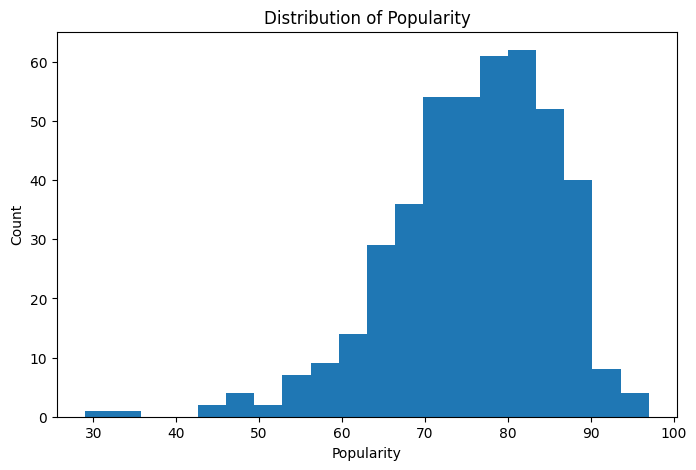

In [192]:
plt.figure(figsize=(8,5))
plt.hist(df3['Popularity'], bins=20)
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.title("Distribution of Popularity")
plt.show()


3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

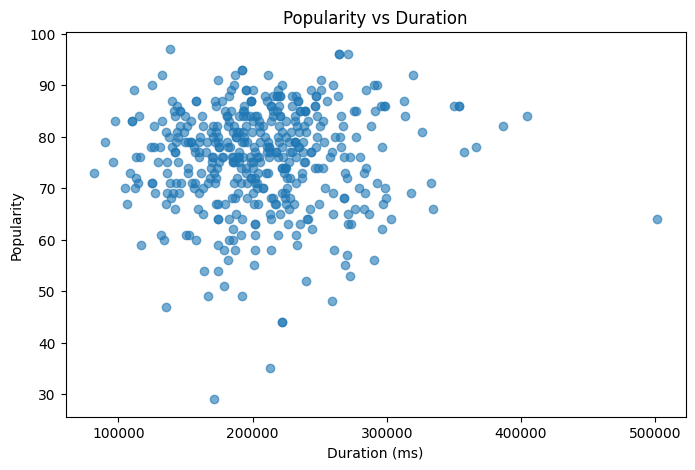

In [193]:
plt.figure(figsize=(8,5))
plt.scatter(df3['Duration (ms)'], df3['Popularity'], alpha=0.6)
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.title("Popularity vs Duration")
plt.show()


4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist usinga countplot

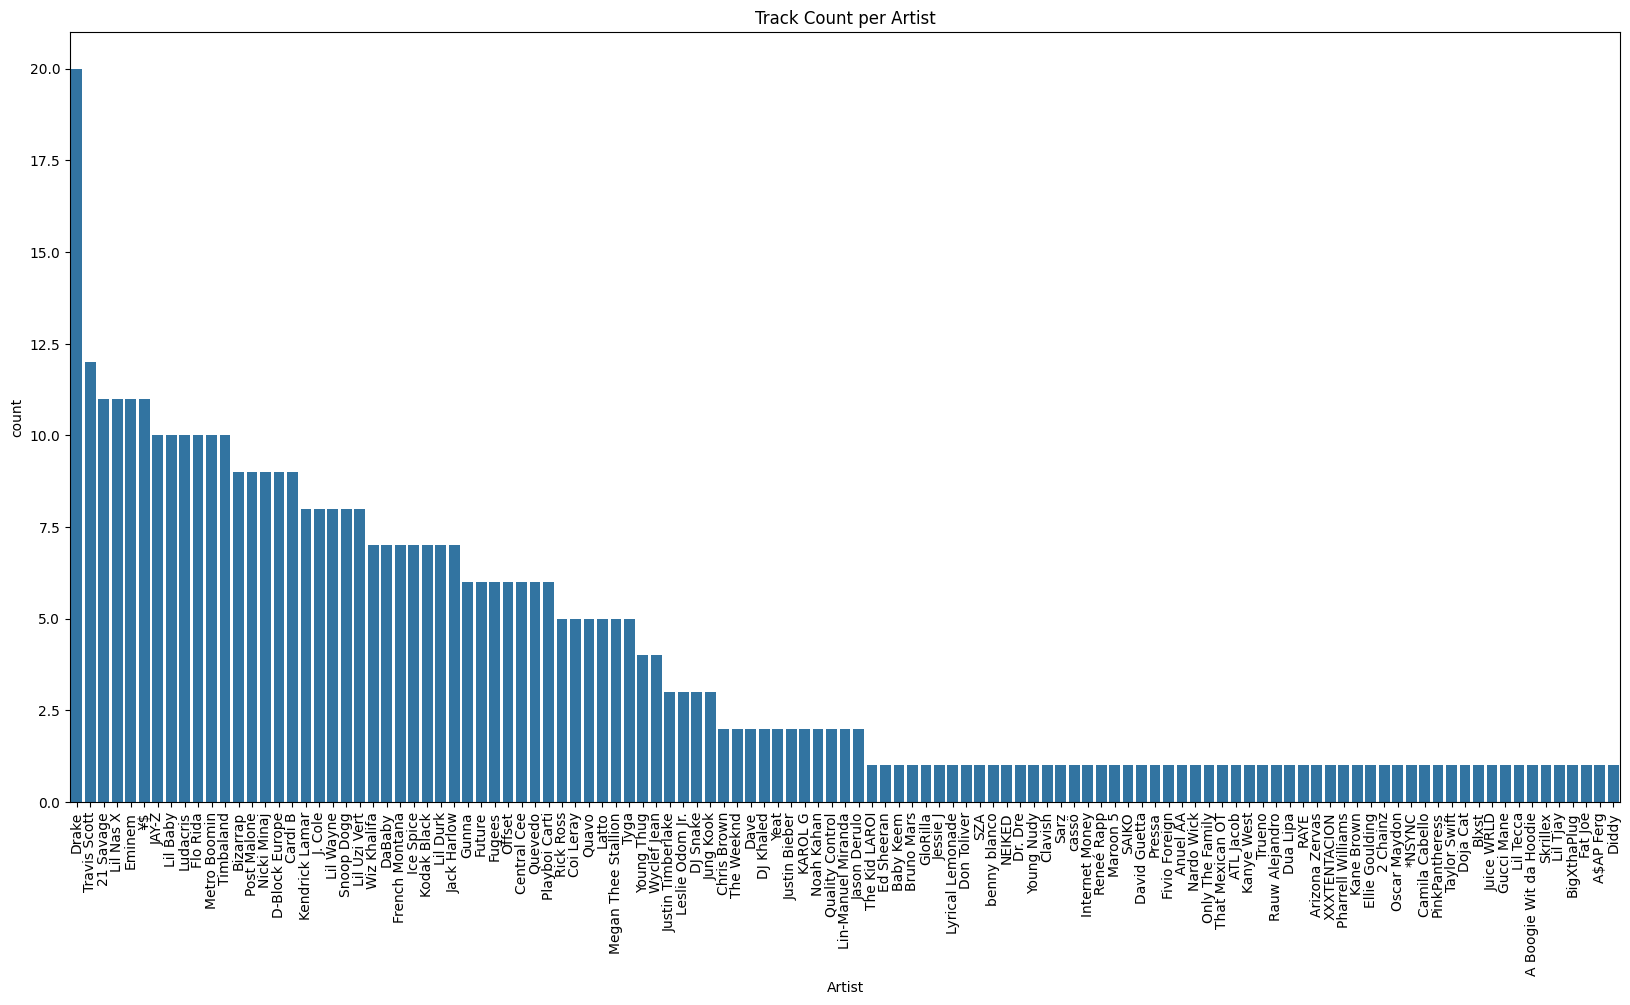

In [194]:
df3['Artist'].value_counts().head(10)

plt.figure(figsize=(20,10))
sns.countplot(data=df3, x='Artist', order=df3['Artist'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Track Count per Artist")
plt.show()


5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [195]:
least_popular = df3.sort_values('Popularity').head(5)
least_popular[['Artist','Track Name','Popularity']]


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
435,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artis.

In [196]:
# Artist popularity = mean popularity of their tracks
artist_pop = df3.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

top5_artists = artist_pop.head(5)
top5_artists


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64

7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [197]:
top5 = artist_pop.head(5).index

for art in top5:
    best_track = df3[df3['Artist']==art].sort_values('Popularity', ascending=False).head(1)
    print(best_track[['Artist','Track Name','Popularity']])


    Artist Track Name  Popularity
140  cassö      Prada          92
     Artist                    Track Name  Popularity
241  Trueno  Mamichula - con Nicki Nicole          89
           Artist          Track Name  Popularity
200  David Guetta  Baby Don't Hurt Me          87
          Artist                  Track Name  Popularity
30  Travis Scott  FE!N (feat. Playboi Carti)          93
    Artist Track Name  Popularity
260     ¥$   CARNIVAL          96


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

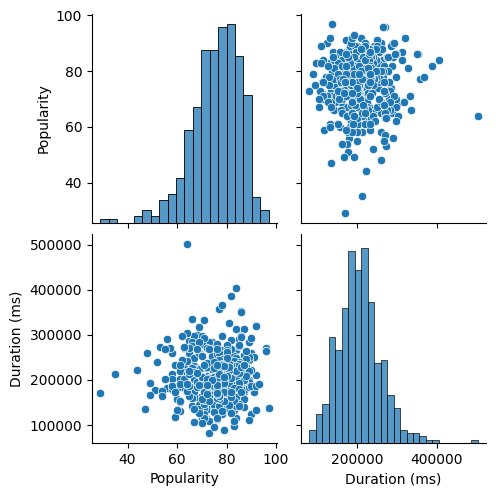

In [198]:
sns.pairplot(df3[['Popularity','Duration (ms)']])
plt.show()


9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

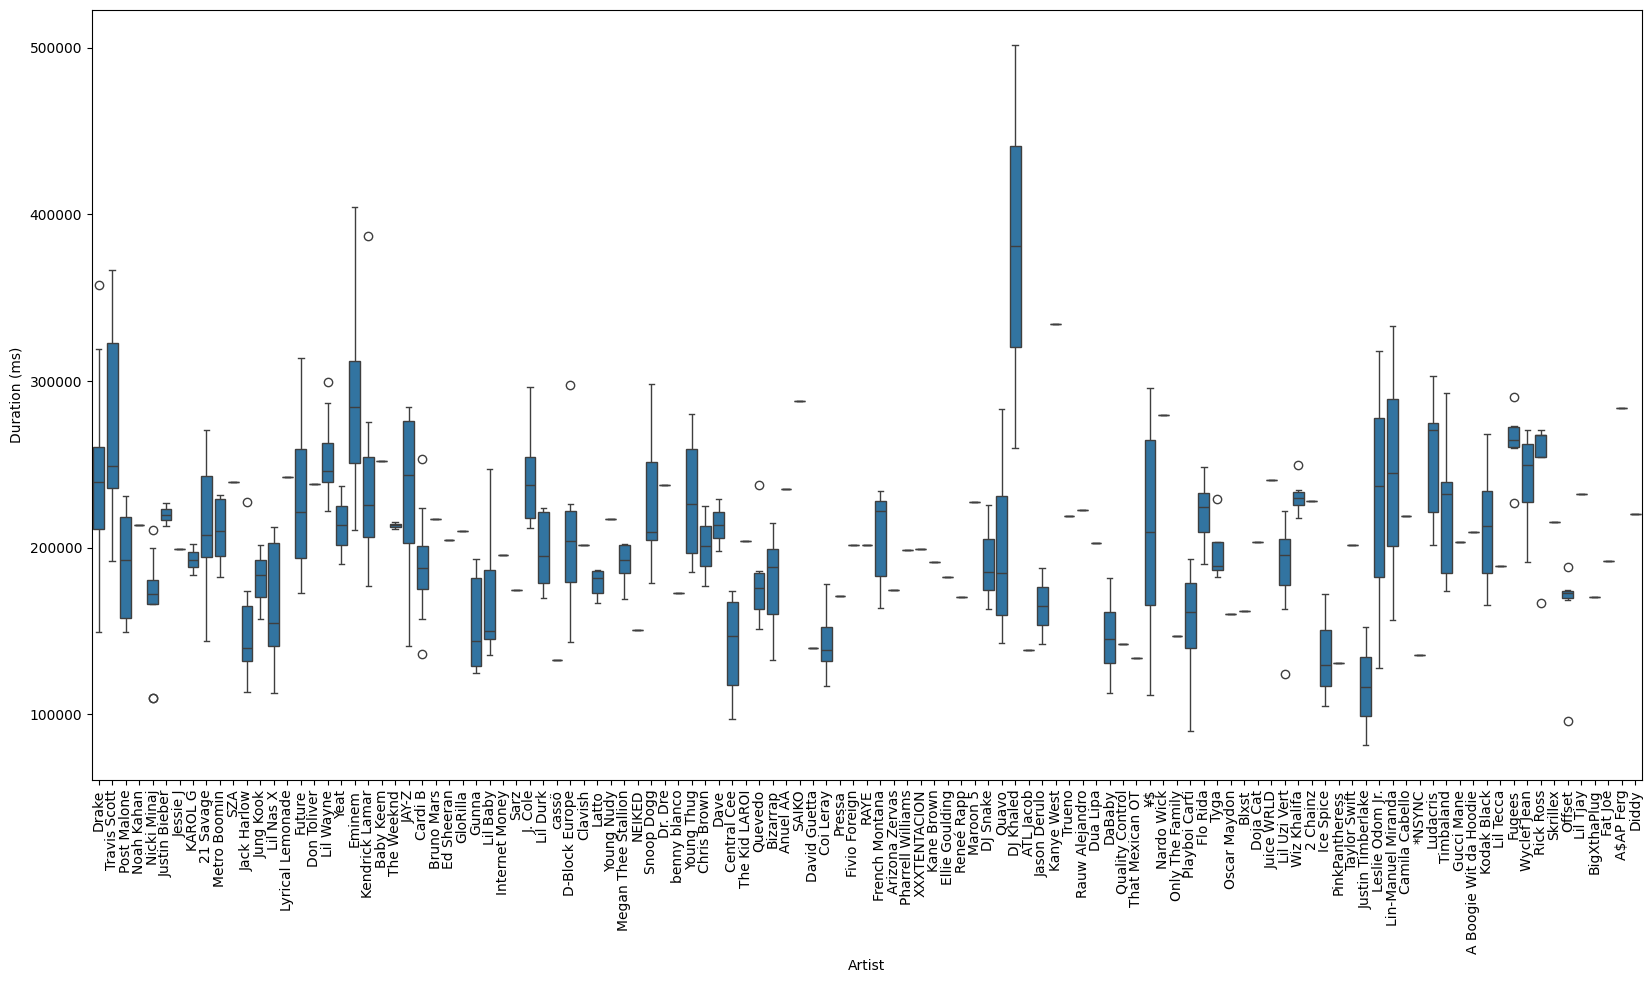

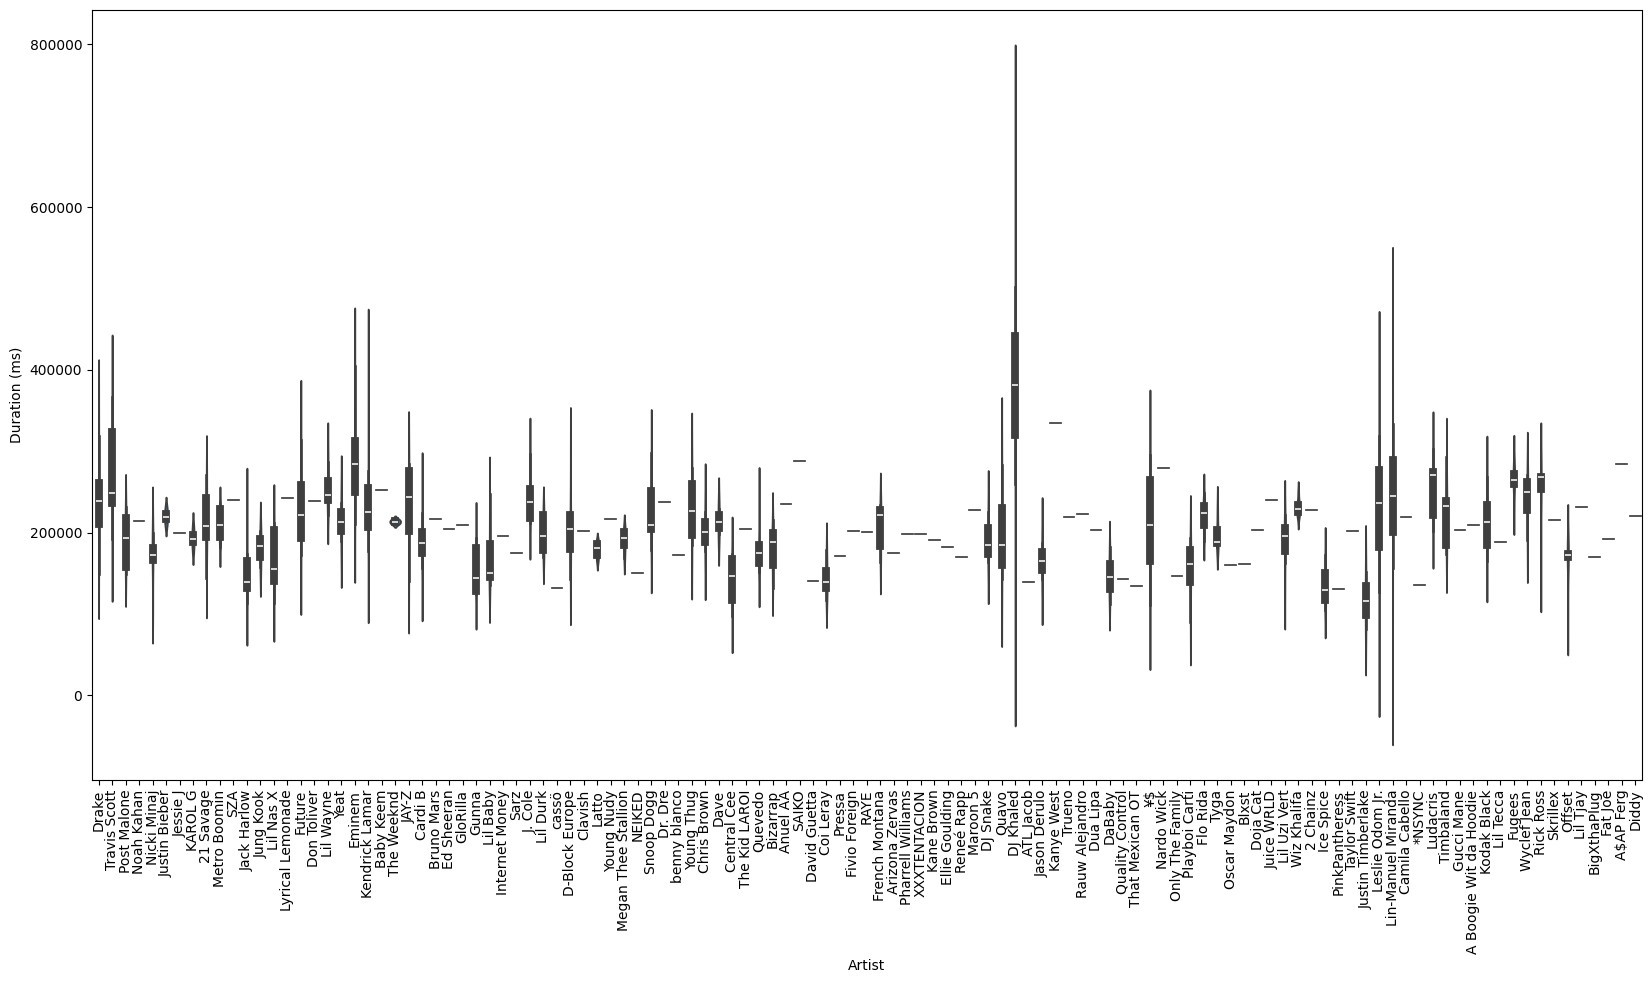

In [199]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df3, x='Artist', y='Duration (ms)')
plt.xticks(rotation=90)
plt.show()

# OR violin plot
plt.figure(figsize=(20,10))
sns.violinplot(data=df3, x='Artist', y='Duration (ms)')
plt.xticks(rotation=90)
plt.show()


10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

In [ ]:
plt.figure(figsize=(20,10))
sns.violinplot(data=df3, x='Artist', y='Popularity')
plt.xticks(rotation=90)
plt.show()




In [ ]:
# Swarm plot (if dataset is small enough)
plt.figure(figsize=(15,10))
sns.stripplot(data=df3, x='Artist', y='Popularity', size=3)
plt.xticks(rotation=90)
plt.show()